In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2, TStyle, THStack
import ROOT
import numpy as np
import awkward as awk
import uproot
import pandas as pd


Welcome to JupyROOT 6.22/06


In [2]:
!pwd

/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis


In [3]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.035)
gStyle.SetTitleYOffset(1.55)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.045)

smalllatex=TLatex()
smalllatex.SetTextSize(0.022)

In [6]:
#d = RDataFrame("tree_MC","~/workdir/MCLundAnalysis/OutputFiles/Lund_8_19/file1.root")
#d = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/AffinityFiles/Files_9_16/file1.root")
#d = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/Slurm/Oct_13_kin/file_*.root")
d = RDataFrame("tree_MC", "~/workdir/MCLundAnalysis/OutputFiles/AffinityFiles/Files_10_17/testKin.root")



In [12]:
h = d.Histo1D(("h",";y ;Counts",100,0,5),"W")
h1 = d.Histo1D(("h1",";x ;Counts", 100, 0, 1), "x")
h2 = d.Histo1D(("h2",";z_h ;Counts", 100, 0, 1), "z_h")
h3 = d.Histo1D(("h3",";pT ;Counts", 100, 0, 1), "pt")
h4 = d.Histo1D(("h4",";Ph ;Counts", 100, 0, 10), "Ph")
h5 = d.Histo1D(("h5",";Mh ;Counts", 100, 0, 2), "Mdihadron")
h6 = d.Histo1D(("h6",";Mx ;Counts", 100, 0, 3), "Mx")
h7 = d.Histo1D(("h7",";R0 ;Counts", 100, 0, 3), "R0")
h8 = d.Histo1D(("h8",";R1 ;Counts", 100, 0, 3), "R1")

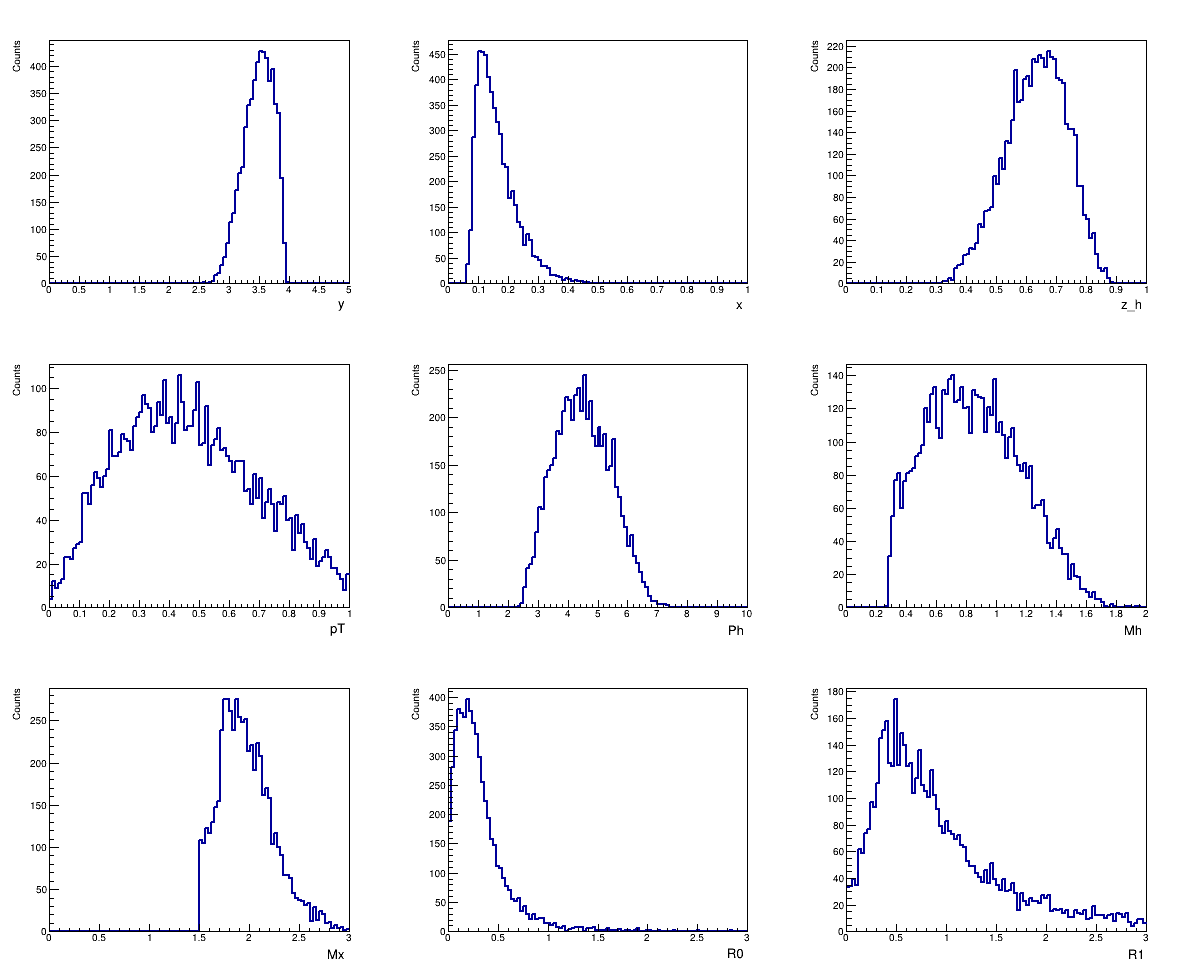

In [13]:
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
harray = np.array([h,h1,h2,h3,h4,h5,h6,h7,h8])
c.cd(1)
h.Draw("histo")
c.cd(2)
h1.Draw("histo")
c.cd(3)
h2.Draw("histo")
c.cd(4)
h3.Draw("histo")
c.cd(5)
h4.Draw("histo")
c.cd(6)
h5.Draw("histo")
c.cd(7)
h6.Draw("histo")
c.cd(8)
h7.Draw("histo")
c.cd(9)
h8.Draw("histo")
c.Draw()

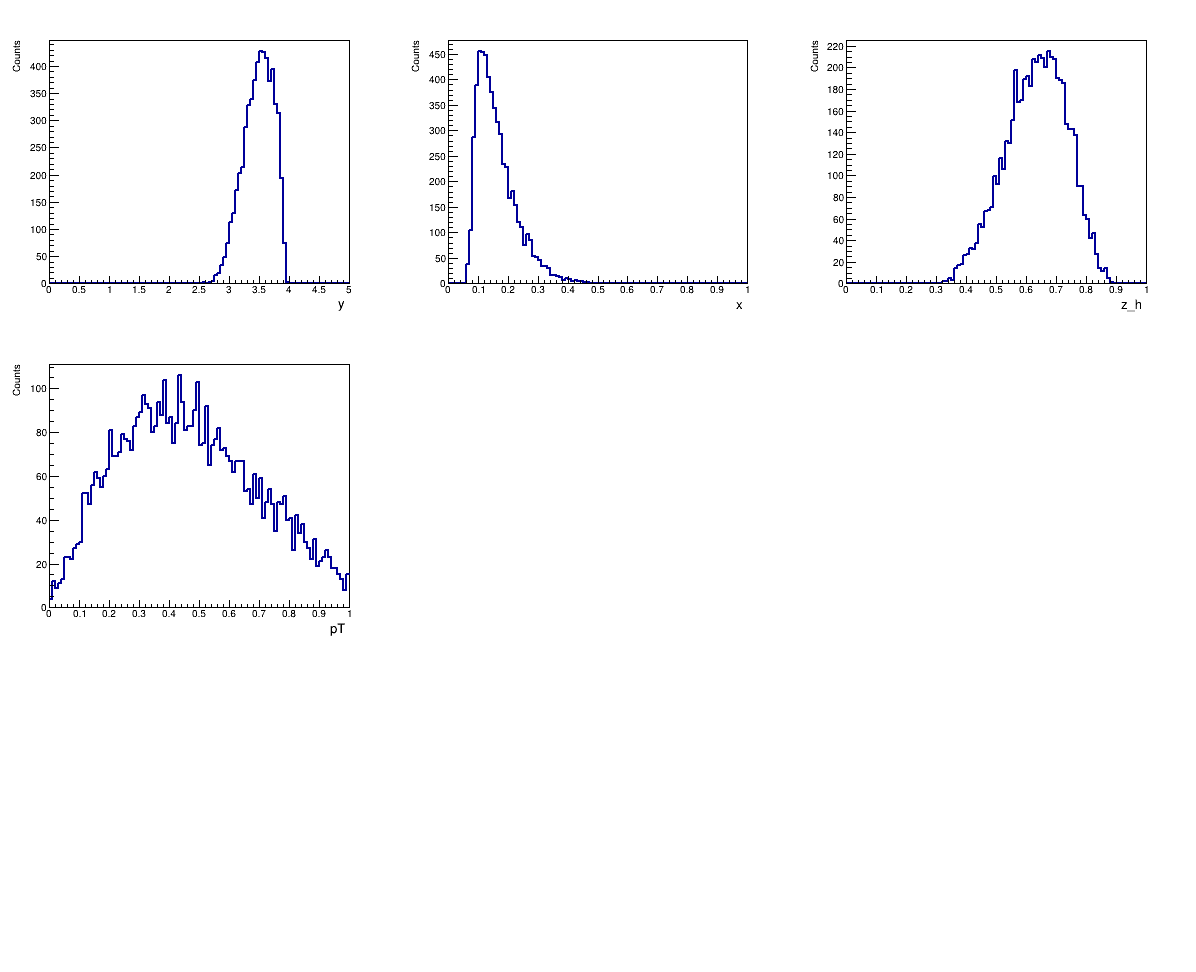

In [14]:
stack = THStack("hs","")
c = TCanvas("c","c",1200,1000)
c.Divide(3,3)
c.cd(1)
h.Draw("histo")
c.cd(2)
h1.Draw("histo")
c.cd(3)
h2.Draw("histo")
c.cd(4)
h3.Draw("histo")
c.Draw()

In [53]:
a = 3.26912 * 10 ** 2
b = 2.61037 * 10 ** (-3)
c = 3.66979 * 10 ** (-1)
e = 2.718281828459045

In [31]:
def func(x):
    y = a * (e ** (-((x - b)**2)/(2 * c ** 2)))
    return y

In [32]:
calcarry = np.linspace(-1.4, 1.5, 10729)

In [33]:
yarray = np.zeros(len(calcarry))
for i in range(len(calcarry)):
    yarray[i] = func(calcarry[i])

In [52]:
chiarray = np.zeros(len(yarray))
print(len(chiarray))

10729


In [49]:
def chi2(data, _yarray):
    for i in range(len(data)):
        chiarray[i] = ((data[i] - _yarray[i]) ** 2) / (4)
    return chiarray

In [57]:
for i in range(len(chiarray)):
        chiarray[i] = ((npyarray[i] - yarray[i]) ** 2) / (4)

In [37]:
npy = d.AsNumpy()

In [38]:
npyarray = npy["PFkix"]

In [42]:
print(len(npyarray))

10729


In [43]:
print(len(yarray))

10729


In [50]:
chiarray = chi2(npyarray, yarray)

TypeError: 'NoneType' object does not support item assignment

In [48]:
print(chiarray)

None


In [58]:
chi2val = np.sum(chiarray)

In [59]:
print(chi2val)

64286321.2195673


In [8]:
#Converting root to excel
up4_file = uproot.open("testfiles/testfile.root")
up4_MC = up4_file["tree_MC"]
xarray = up4_MC["x"].array(library="np")
zarray = up4_MC["z_h"].array(library="np")
ptarray = up4_MC["pt"].array(library="np")
Q2array = up4_MC["Q2"].array(library="np")
filepath = 'test.xlsx'

array = np.stack((xarray,zarray,ptarray,Q2array),axis = 1)
df = pd.DataFrame (array)

df.to_excel(filepath, index=False)

In [15]:
up4_MC.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
z_h                  | double                   | AsDtype('>f8')
x                    | double                   | AsDtype('>f8')
pt                   | double                   | AsDtype('>f8')
Q2                   | double                   | AsDtype('>f8')
Ph                   | double                   | AsDtype('>f8')
P                    | double                   | AsDtype('>f8')
Mdihadron            | double                   | AsDtype('>f8')
MC92index            | double                   | AsDtype('>f8')
R0                   | double                   | AsDtype('>f8')
R1                   | double                   | AsDtype('>f8')
R2                   | double                   | AsDtype('>f8')
kim                  | double                   | AsDtype('>f8')
kie                  | double                   | AsDtype(

In [28]:
import numpy as np
x = np.array([0,0,1,2,2,3,4,5,5,6,6,6,6,6,6,7,7,7,8,8])

In [ ]:
TH1F *h1 = new TH1F("h1","h1 title", 10,0,10);